# Summary

```Objective```

todo

```Methods```

todo

```Results```

todo

# Config

# Libs

In [2]:
import numpy as np
import torch
import torchio as tio
import torchio.transforms as transforms
import matplotlib.pyplot as plt
import h5py
import nibabel as nib
from torchmetrics import PeakSignalNoiseRatio, StructuralSimilarityIndexMeasure

def show_img(img):
    plt.figure(dpi=100)
    im = plt.imshow(img, cmap='gray')
    # cbar = plt.colorbar(im, shrink=0.5)
    im.set_clim(vmin=0, vmax=255)
    plt.xticks([])
    plt.yticks([])
    plt.show()

def show_img2(img):
    plt.figure(dpi=100)
    im = plt.imshow(img, cmap='gray')
    # cbar = plt.colorbar(im, shrink=0.5)
    im.set_clim(vmin=0, vmax=1)
    plt.xticks([])
    plt.yticks([])
    plt.show()

c:\Users\NUGURI\anaconda3\envs\misalign\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


source size:  (256, 304, 200)
target size:  (256, 304, 200)
output size:  (256, 304, 200)


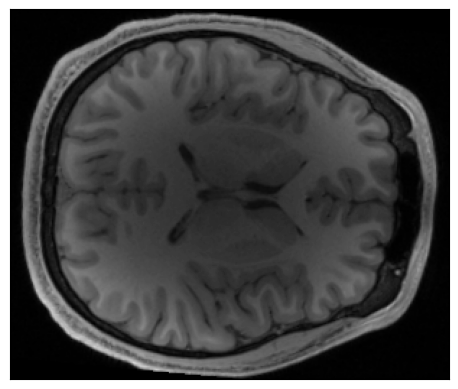

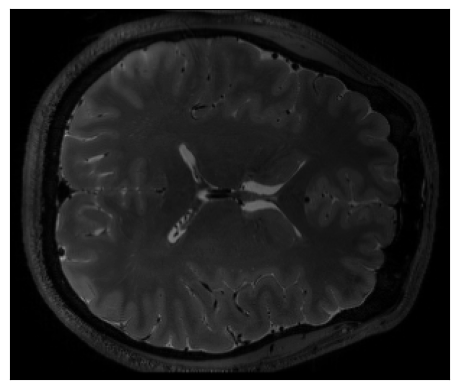

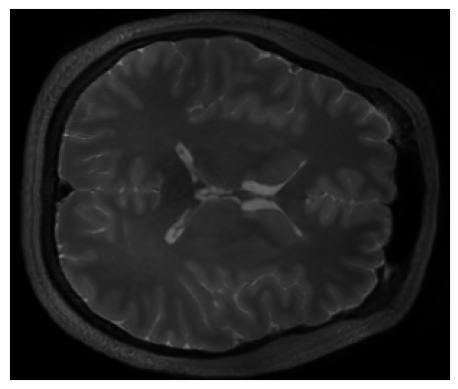

In [8]:
dir = 'C:/Users/NUGURI\Workspace/2023.08.22_misalign_CBM\logs/Model_proposed_A_to_B_Data_Split_3T1_7T2_Misalign_X0_Y5_R2.5_M0_D0/RW_CX_100_5_100_lv5_3T1_7T2_s/runs/2023-08-25_19-38-00/results/'

nii_path_source = dir + 'a_1.nii.gz'
nii_path_target = dir + 'b_1.nii.gz'
nii_path_output = dir + 'preds_a_1.nii.gz'

source_tmp = nib.load(nii_path_source)
traget_tmp = nib.load(nii_path_target)
output_tmp = nib.load(nii_path_output)

source = source_tmp.get_fdata()
target = traget_tmp.get_fdata()
output = output_tmp.get_fdata()

print('source size: ', source.shape)
print('target size: ', target.shape)
print('output size: ', output.shape)

zz =120
show_img(source[:,:,zz])
show_img(target[:,:,zz])
show_img(output[:,:,zz])

In [14]:
data_range = 1
ssim_metric = StructuralSimilarityIndexMeasure(data_range=data_range)
psnr_metric = PeakSignalNoiseRatio(data_range=data_range)

source_1z = torch.tensor(source[:,:,zz]/255).unsqueeze(0).unsqueeze(0).float()
target_1z = torch.tensor(target[:,:,zz]/255).unsqueeze(0).unsqueeze(0).float()
output_1z = torch.tensor(output[:,:,zz]/255).unsqueeze(0).unsqueeze(0).float()

SSIM = ssim_metric(target_1z, output_1z)
PSNR = psnr_metric(target_1z, output_1z)

print("SSIM:", SSIM)
print("PSNR:", PSNR)

SSIM: tensor(0.7749)
PSNR: tensor(27.6114)


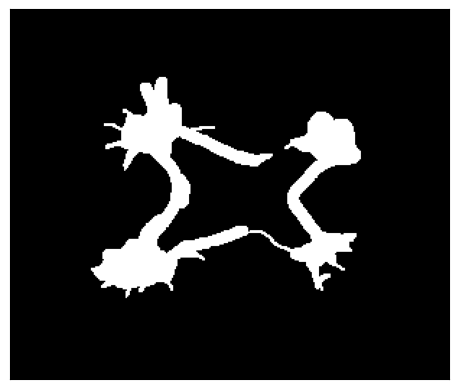

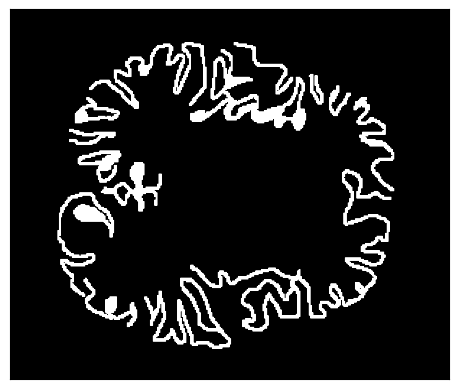

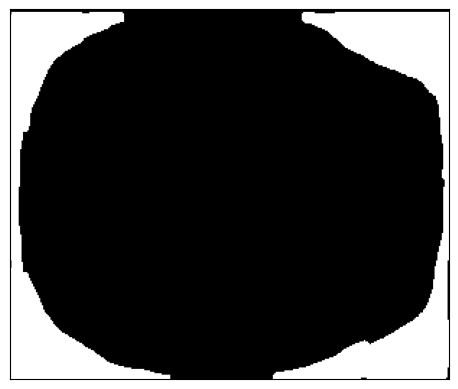

In [15]:
dir = 'C:/Users/NUGURI\Workspace/2023.08.22_misalign_CBM\logs/Model_proposed_A_to_B_Data_Split_3T1_7T2_Misalign_X0_Y5_R2.5_M0_D0/RW_CX_100_5_100_lv5_3T1_7T2_s/runs/2023-08-25_19-38-00/results/'

WM_mask_path = dir + 'WM_mask_preds_a_1_120z.nii'
GM_mask_path = dir + 'GM_mask_preds_a_1_120z.nii'
BG_mask_path = dir + 'BG_mask_preds_a_1_120z.nii'

tmp1 = nib.load(WM_mask_path)
tmp2 = nib.load(GM_mask_path)
tmp3 = nib.load(BG_mask_path)

WM_mask = tmp1.get_fdata()
GM_mask = tmp2.get_fdata()
BG_mask = tmp3.get_fdata()

zz =120
show_img2(WM_mask[:,:,zz])
show_img2(GM_mask[:,:,zz])
show_img2(BG_mask[:,:,zz])

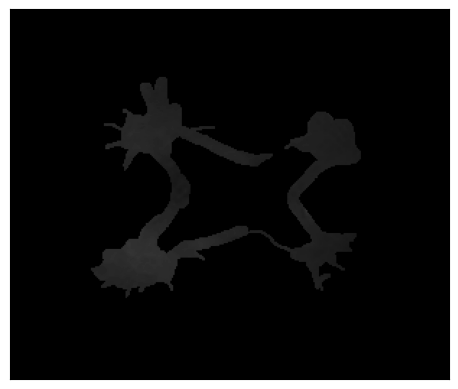

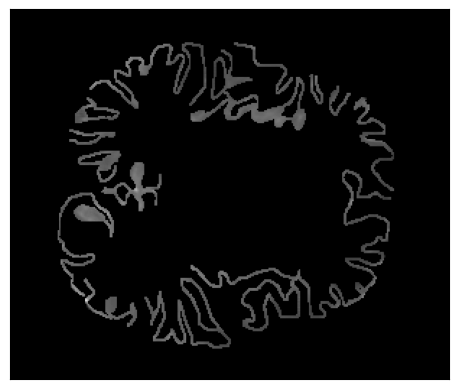

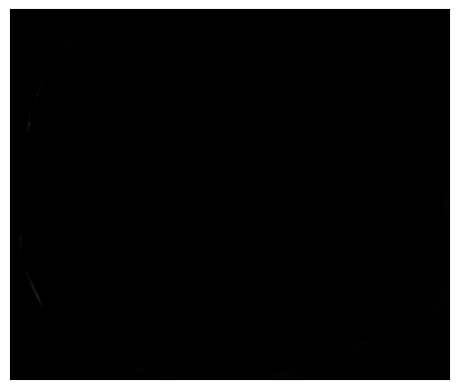

SNR= 15.936519440982075
CNR= 26.673152141570178


In [18]:
# test_img = source_1z
# test_img = target_1z
test_img = output_1z

WM = test_img.squeeze() * WM_mask[:,:,zz]
show_img2(WM)
WM_array = WM.reshape(WM.size(0)*WM.size(1))
WM_array = WM_array.numpy()
WM_array = WM_array[WM_array != 0]
# print(np.mean(WM_array))

GM = test_img.squeeze() * GM_mask[:,:,zz]
show_img2(GM)
GM_array = GM.reshape(GM.size(0)*GM.size(1))
GM_array = GM_array.numpy()
GM_array = GM_array[GM_array != 0]
# print(np.mean(GM_array))

BG = test_img.squeeze() * BG_mask[:,:,zz]
show_img2(BG)
BG_array = BG.reshape(BG.size(0)*BG.size(1))
BG_array = BG_array.numpy()
BG_array = BG_array[BG_array != 0]
# print(np.std(BG_array))

SNR = np.mean(WM_array)/np.std(BG_array)
CNR = abs(np.mean(WM_array) - np.mean(GM_array))/np.std(BG_array)
print("SNR=", SNR)
print("CNR=", CNR)